In [44]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn import metrics

from operator import itemgetter

In [4]:
df = pd.read_csv('transformed_dataframe.csv')

In [5]:
df.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.230073,-0.202770,4,1,3,7,5,1.053769,0.880629,0.533895,...,0,0,0,1,0,0,0,0,1,0
1,0.473236,-0.086107,4,1,3,6,8,0.159469,-0.427190,-0.573757,...,0,0,0,1,0,0,0,0,1,0
2,-0.089411,0.081281,3,1,3,7,5,0.987524,0.832191,0.341751,...,0,0,0,1,0,0,0,0,1,0
3,-0.464509,-0.091179,3,1,3,7,5,-1.860986,-0.717817,-0.573757,...,0,0,0,1,1,0,0,0,0,0
4,0.660785,0.386636,3,1,3,8,5,0.954402,0.735316,1.404192,...,0,0,0,1,0,0,0,0,1,0


## Split data into test and training set

In [6]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

## Fit the linear model

In [234]:
lm = LinearRegression()

In [235]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [236]:
predictions_linear = lm.predict(X_test)

In [237]:
print('\nR^2 of linear model is {:.5f}\n'.format(metrics.r2_score(y_test, predictions_linear)))


R^2 of linear model is 0.89526



## Lasso:

I decided to maximize R^2 with respect to alpha. I created a for loop which would run through possible values of alpha and find the R^2 of the testing set for each value of alpha. I then added these (alpha, R^2) pairs to a list:

In [238]:
r2_alpha_lasso = [None]*200
i=0
for num in np.logspace(-4,1,len(r2_alpha_lasso)):
    lasso = linear_model.Lasso(alpha=num, random_state=50)
    lasso.fit(X_train, y_train)
    predictions_lasso = lasso.predict(X_test)
    r2 = metrics.r2_score(y_test, predictions_lasso)
    r2_alpha_lasso[i] = [num, r2]
    i+=1

Next I found the value of alpha where R^2 was at its maximum:

In [239]:
r2_maximized_lasso = sorted(r2_alpha_lasso, key=itemgetter(1))[-1]

In [240]:
print("\nR^2 maximized where:\n    Alpha: {:.5f}\n    R^2: {:.5f}\n".format(r2_maximized_lasso[0], r2_maximized_lasso[1]))


R^2 maximized where:
    Alpha: 0.00095
    R^2: 0.91190



### Graph of Alpha vs $R^2$

I created a dataframe of the $R^2$, alpha pairs for the lasso regression and made a graph to show the relationship:

In [241]:
r2_alpha_lasso_df = pd.DataFrame(r2_alpha_lasso,columns=['Alpha','R^2'])

(0, 10)

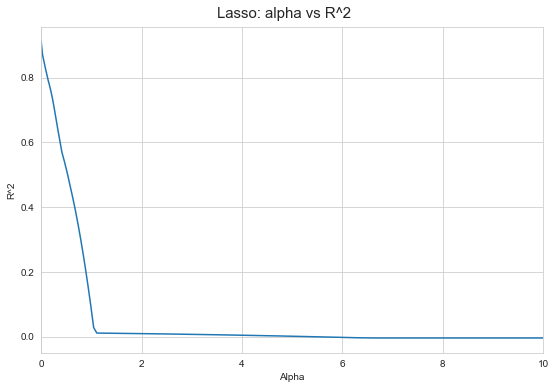

In [242]:
plt.figure(figsize=(9,6))
plt.figtext(.5,.9,'Lasso: alpha vs R^2', fontsize=15, ha='center')
sns.lineplot(x='Alpha',y='R^2',data=r2_alpha_lasso_df)
plt.xlim(0, 10)

We can see that $R^2$ reaches its maximum value very quickly and decreases dramatically.

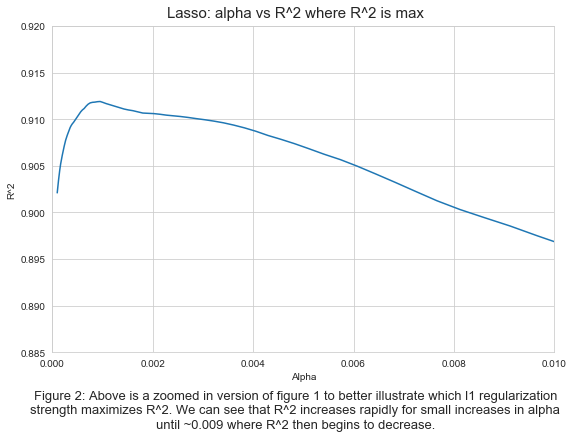

In [270]:
plt.figure(figsize=(9,6))
plt.figtext(.5,.9,'Lasso: alpha vs R^2 where R^2 is max', fontsize=15, ha='center')
txt="Figure 2: Above is a zoomed in version of figure 1 to better illustrate which l1 regularization\nstrength maximizes R^2. We can see that R^2 increases rapidly for small increases in alpha\nuntil ~0.009 where R^2 then begins to decrease."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=13)
plt.xlim(0, 0.01)
plt.ylim(0.885,0.92)

sns.lineplot(x='Alpha',y='R^2',data=r2_alpha_lasso_df)

## Ridge

In [244]:
r2_alpha_ridge = [None]*500
i=0
for num in np.logspace(-1,2,len(r2_alpha_ridge)):
    ridge = linear_model.Ridge(alpha=num, random_state=50)
    ridge.fit(X_train, y_train)
    predictions_ridge = ridge.predict(X_test)
    r2 = metrics.r2_score(y_test, predictions_ridge)
    r2_alpha_ridge[i] = [num, r2]
    i+=1

In [245]:
r2_maximized_ridge = sorted(r2_alpha_ridge, key=itemgetter(1))[-1]

In [246]:
print("\nR^2 maximized where:\n    Alpha: {:.5f}\n    R^2: {:.5f}\n".format(r2_maximized_ridge[0], r2_maximized_ridge[1]))


R^2 maximized where:
    Alpha: 18.21885
    R^2: 0.91206



### Graph of alpha vs R^2

In [247]:
r2_alpha_ridge_df = pd.DataFrame(r2_alpha_ridge,columns=['Alpha','R^2'])

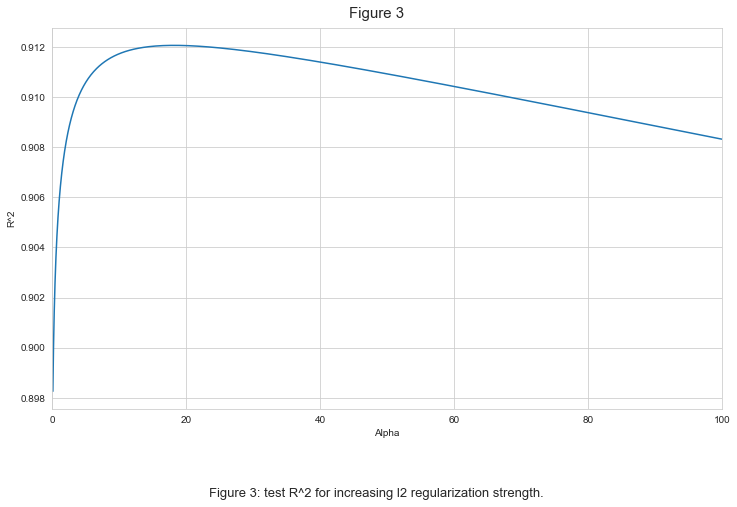

In [248]:
plt.figure(figsize=(12,7))
plt.figtext(.5,.9,'Figure 3', fontsize=15, ha='center')
txt="Figure 3: test R^2 for increasing l2 regularization strength."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=13)
plt.xlim(0,100)

sns.lineplot(x='Alpha',y='R^2',data=r2_alpha_ridge_df)

## Comparing the figures:

Most obvious is the difference in the shape of the graphs. Lasso allows for a much smaller tuning parameter before $R^2$ begins to drop dramatically. Ridge peaks more slowly and decreases more steadily. From this one iteration it looks like ridge would allow a larger range for our tuning parameter than lasso does.

It feels a bit silly to try to conclude something about the results of the three models since they are all incredibly similar. Cross-validating would probably have provided greater insight just because I would have a less biased $R^2$ score and I could compare based on that and the variance of the $R^2$ score for each model. Either way though, it seems clear that three models do have similar results, which suggests that the features originally in the model do a good job of predicting sale price. I would speculate however that even under cross validation ridge and lasso would still perform marginally better than OLS. However, I don't think that the difference between ridge and lasso would be terribly significant. Because lasso forces some of the coefficients to zero, it will only perform significantly better if it turned out that only very few of the features were linearly related to sale price, and based on our results so far, this does not seem to be the case. 

## Run ridge and lasso for determined max values of alpha:

### Create instance of ridge at max value for alpha

In [249]:
ridge = linear_model.Ridge(alpha=r2_maximized_ridge[0],random_state=50)

In [250]:
ridge.fit(X_train, y_train)

Ridge(alpha=18.21885343465167, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=50, solver='auto', tol=0.001)

In [251]:
predictions_ridge = ridge.predict(X_test)

In [252]:
ridge_coeffs_df = pd.DataFrame(ridge.coef_,X.columns,columns=['Coefficient'])

In [253]:
ridge_coeffs_abs_df = ridge_coeffs_df.abs().sort_values('Coefficient', ascending=False)

### Create instance of lasso at max value for alpha

In [254]:
lasso = linear_model.Lasso(alpha=r2_maximized_lasso[0])

In [255]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.0009547716114208056, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [256]:
predictions_lasso = lasso.predict(X_test)

In [257]:
lasso_coeffs_df = pd.DataFrame(lasso.coef_,X.columns,columns=['Coefficient'])

In [258]:
lasso_coeffs_abs_df = lasso_coeffs_df.abs().sort_values('Coefficient', ascending=False)

### How many of the coefficients went to zero?

In [261]:
lasso_coeffs_abs_df[lasso_coeffs_abs_df['Coefficient']==0].count()

Coefficient    121
dtype: int64

We see that 121 of the coefficients, or roughly ~51.93% of the total number of explanatory variables.

## Comparing top 10 most important variables

Here I compared the absolute value of the top 10 coefficients for both ridge and lasso:

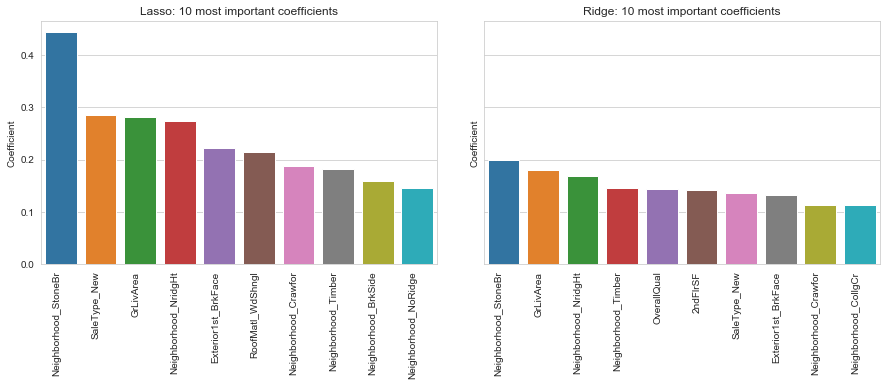

In [260]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,6), sharey=True)

sns.barplot(x=lasso_coeffs_abs_df[:10].index,y='Coefficient',data=lasso_coeffs_abs_df[:10], ax=ax1)
ax1.title.set_text('Lasso: 10 most important coefficients')
plt.setp(ax1.xaxis.get_majorticklabels(),rotation=90,horizontalalignment='right')

sns.barplot(x=ridge_coeffs_abs_df[:10].index,y='Coefficient',data=ridge_coeffs_abs_df[:10], ax=ax2)
ax2.title.set_text('Ridge: 10 most important coefficients')
plt.setp(ax2.xaxis.get_majorticklabels(),rotation=90,horizontalalignment='right')

fig.tight_layout(pad=3)

fig.show()

We can see that some features are included in the top 10 of both methods and some are not. I am not really surprised that different neighborhoods and square footage wound up being a good indicator of sale price.

# Appendix

Contains graph showing all the features for both ridge and lasso. Both models take the absolute value of the coefficients.

1. Ridge

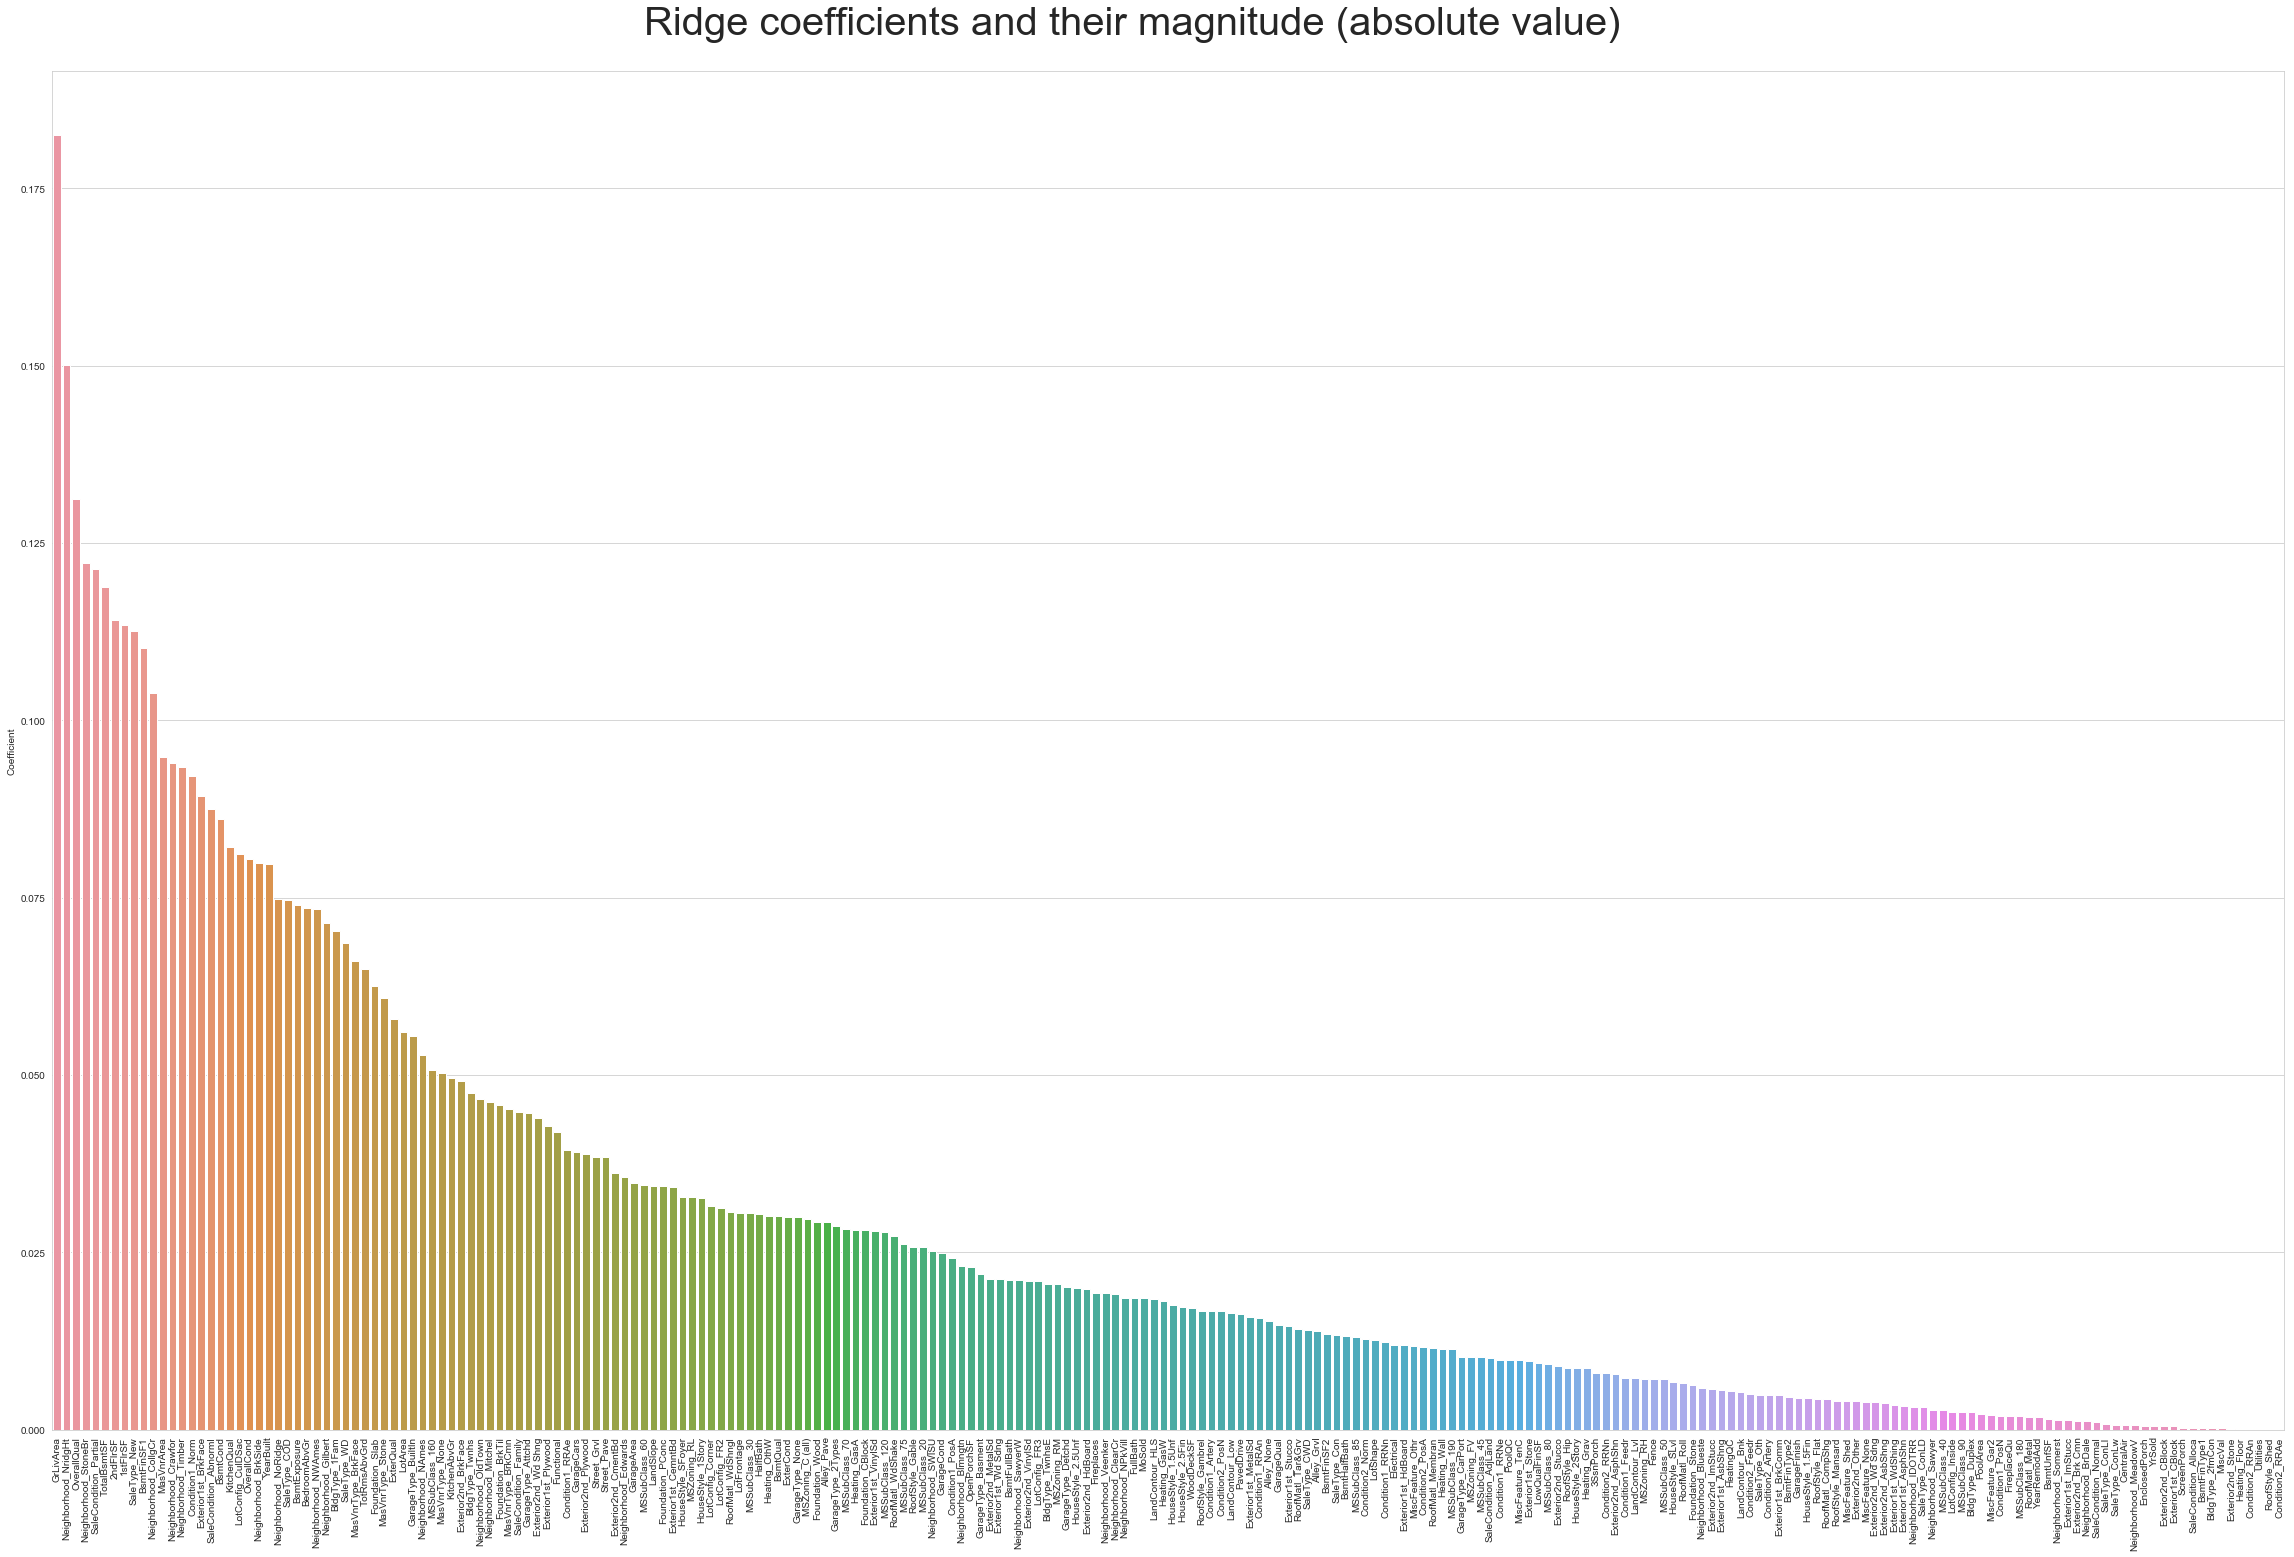

In [37]:
plt.figure(figsize=(40,25))
plt.xticks(rotation=90)
plt.figtext(.5,.9,'Ridge coefficients and their magnitude (absolute value)', fontsize=40, ha='center')
sns.barplot(x=ridge_coeffs_abs_df.index,y='Coefficient',data=ridge_coeffs_abs_df,)

 2. Lasso

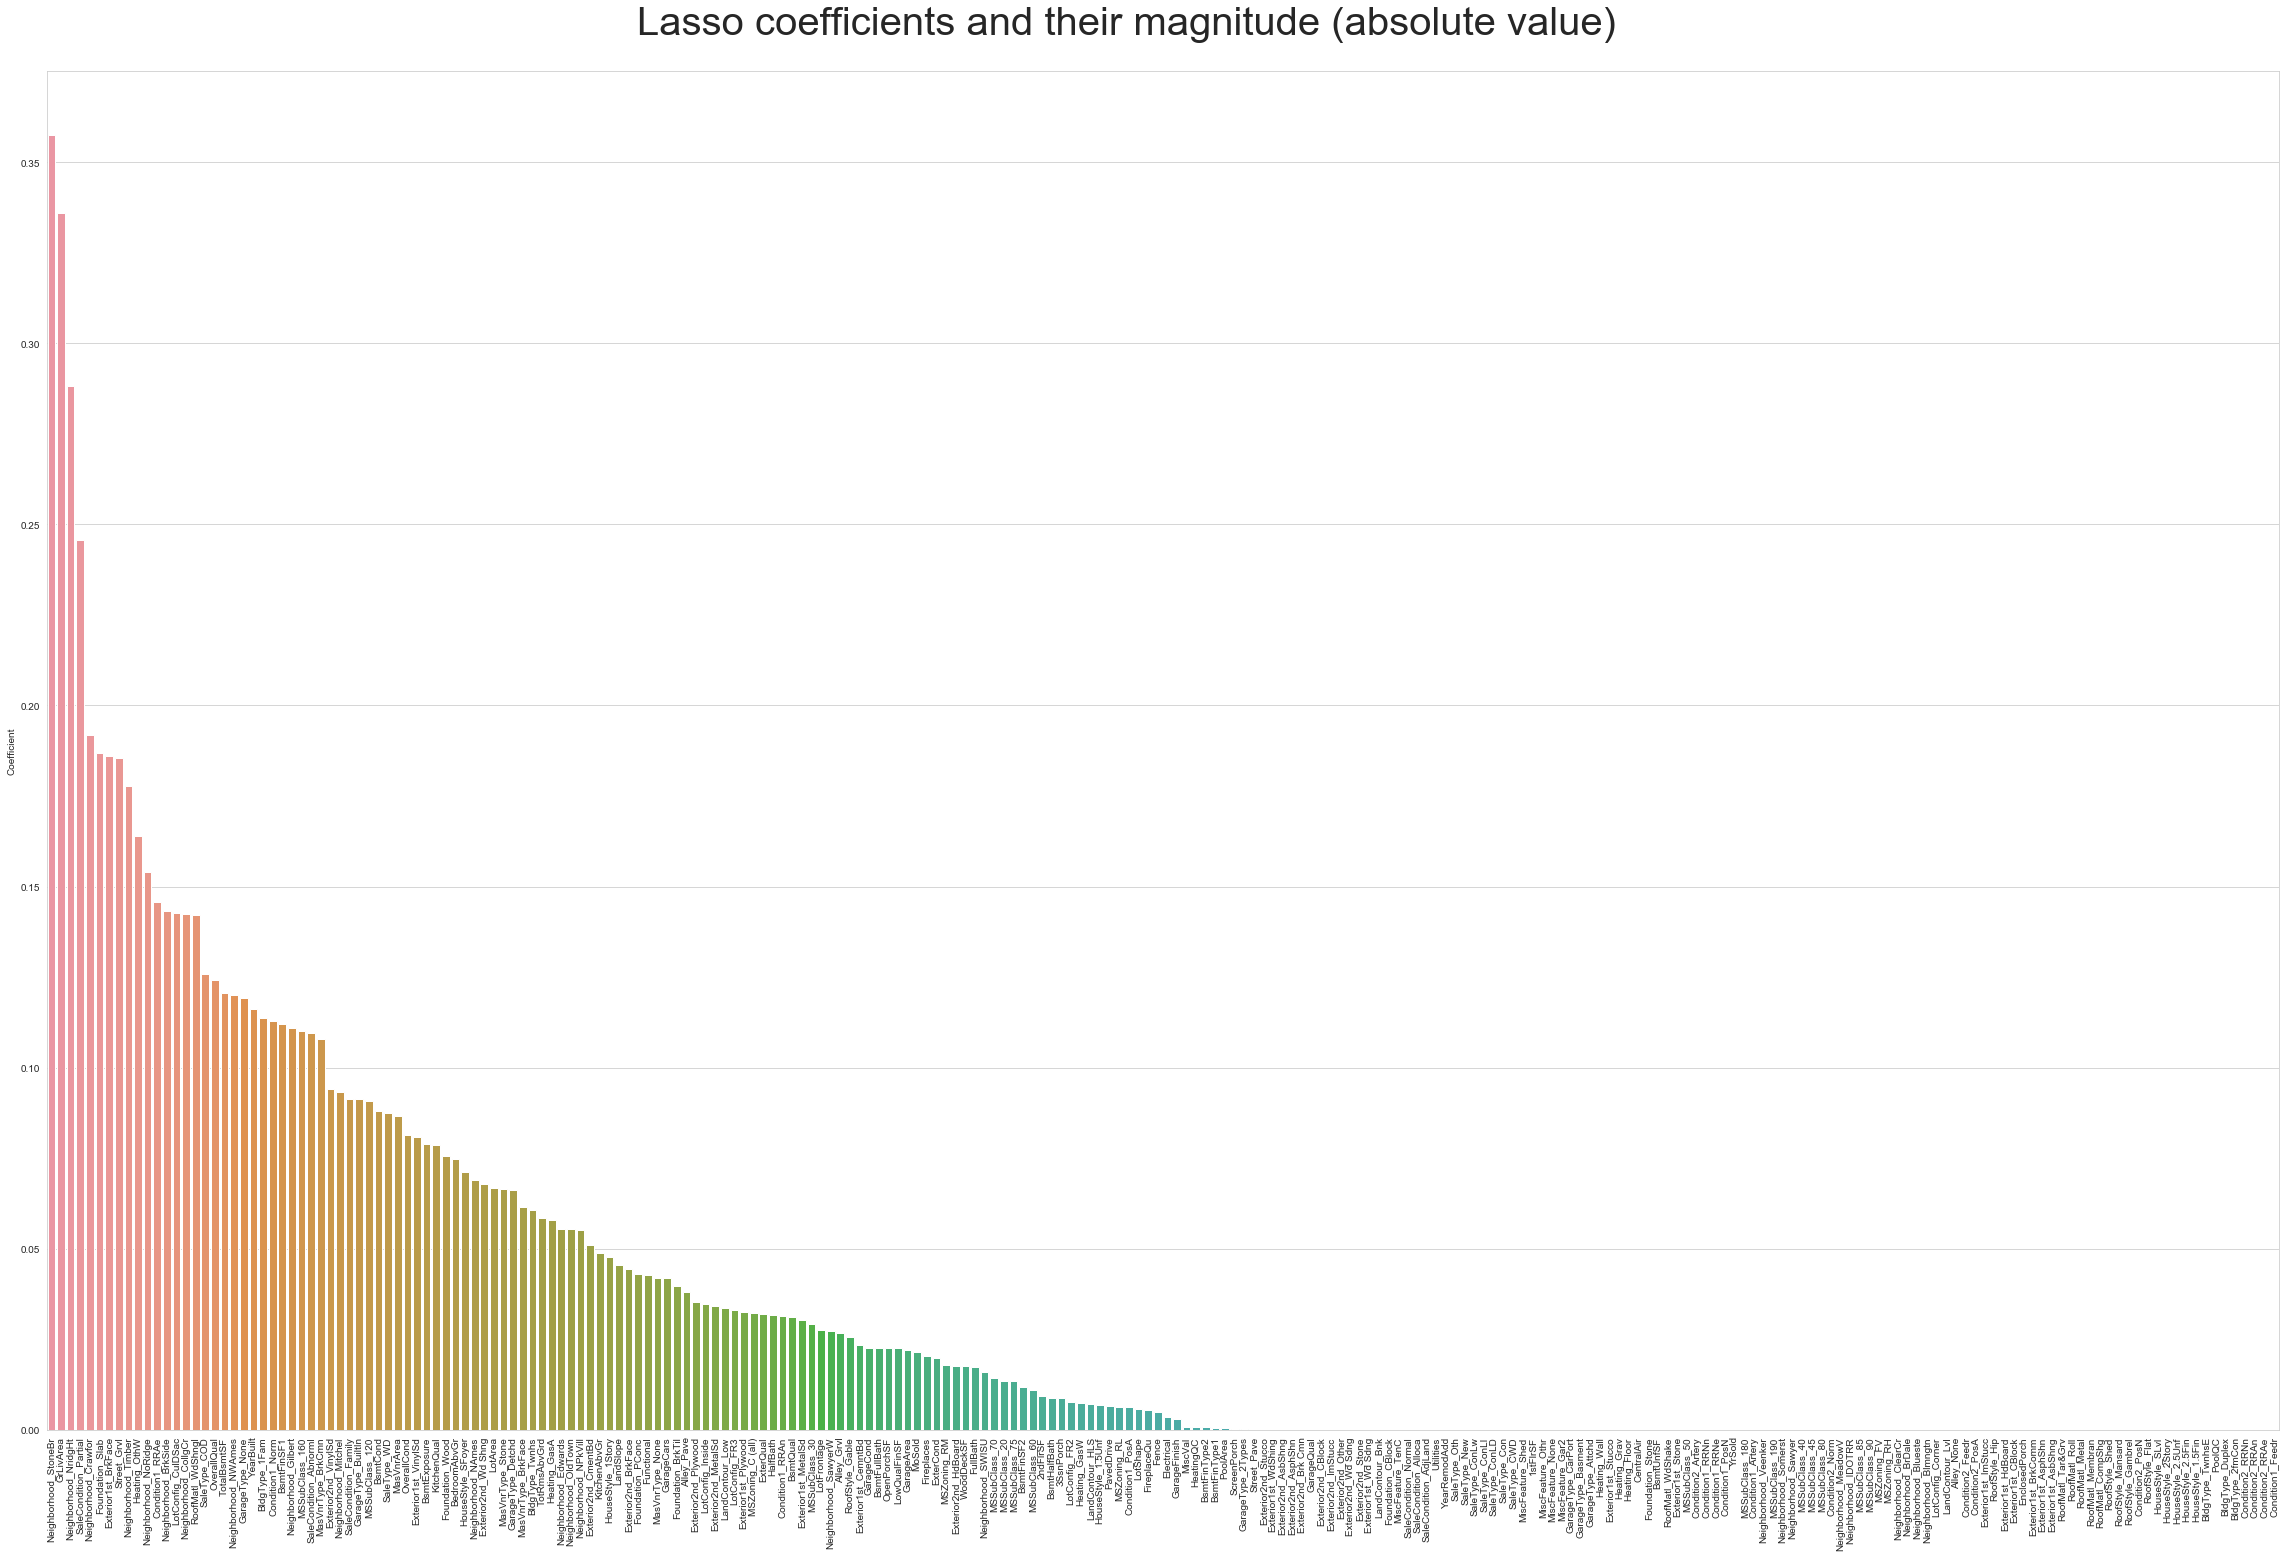

In [38]:
plt.figure(figsize=(40,25))
plt.xticks(rotation=90)
plt.figtext(.5,.9,'Lasso coefficients and their magnitude (absolute value)', fontsize=40, ha='center')
sns.barplot(x=lasso_coeffs_abs_df.index,y='Coefficient',data=lasso_coeffs_abs_df)

# Top 10 for lasso

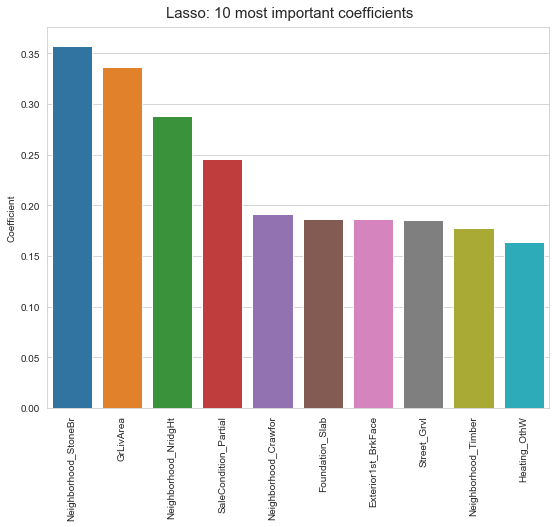

In [129]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
plt.figtext(.5,.9,'Lasso: 10 most important coefficients', fontsize=15, ha='center')
sns.barplot(x=lasso_coeffs_abs_df[:10].index,y='Coefficient',data=lasso_coeffs_abs_df[:10])

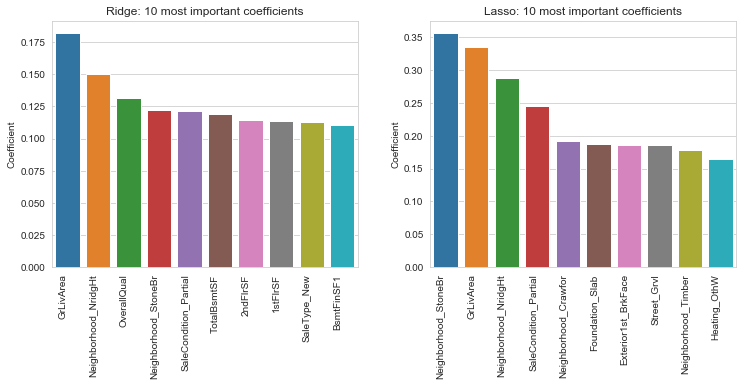

In [140]:
# fig, ax =plt.subplots(1,2)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,6))

# plt.figure(figsize=(7,5))
# plt.xticks(rotation=90)
# plt.figtext(.5,.9,'Ridge: 10 most important coefficients', fontsize=14, ha='center')
sns.barplot(x=ridge_coeffs_abs_df[:10].index,y='Coefficient',data=ridge_coeffs_abs_df[:10], ax=ax1)
ax1.title.set_text('Ridge: 10 most important coefficients')
plt.setp(ax1.xaxis.get_majorticklabels(),rotation=90,horizontalalignment='right')

# plt.figure(figsize=(7,5))
# plt.xticks(rotation=90)
# plt.figtext(.5,.9,'Lasso: 10 most important coefficients', fontsize=15, ha='center')
sns.barplot(x=lasso_coeffs_abs_df[:10].index,y='Coefficient',data=lasso_coeffs_abs_df[:10], ax=ax2)
ax2.title.set_text('Lasso: 10 most important coefficients')
plt.setp(ax2.xaxis.get_majorticklabels(),rotation=90,horizontalalignment='right')


fig.tight_layout(pad=3)

fig.show()